In [1]:
import numpy as np
import pandas as pd
import datetime
import requests
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
url = 'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=BTC&market=USD&apikey=PLWHFCZSI5GFFUMN'
r = requests.get(url)
btc_df = r.json()

print(btc_df)

{'Meta Data': {'1. Information': 'Daily Prices and Volumes for Digital Currency', '2. Digital Currency Code': 'BTC', '3. Digital Currency Name': 'Bitcoin', '4. Market Code': 'USD', '5. Market Name': 'United States Dollar', '6. Last Refreshed': '2021-11-18 00:00:00', '7. Time Zone': 'UTC'}, 'Time Series (Digital Currency Daily)': {'2021-11-18': {'1a. open (USD)': '60344.86000000', '1b. open (USD)': '60344.86000000', '2a. high (USD)': '60740.46000000', '2b. high (USD)': '60740.46000000', '3a. low (USD)': '60125.17000000', '3b. low (USD)': '60125.17000000', '4a. close (USD)': '60547.62000000', '4b. close (USD)': '60547.62000000', '5. volume': '909.46523000', '6. market cap (USD)': '909.46523000'}, '2021-11-17': {'1a. open (USD)': '60058.87000000', '1b. open (USD)': '60058.87000000', '2a. high (USD)': '60840.23000000', '2b. high (USD)': '60840.23000000', '3a. low (USD)': '58373.00000000', '3b. low (USD)': '58373.00000000', '4a. close (USD)': '60344.87000000', '4b. close (USD)': '60344.8700

In [3]:
btc_daily_df = pd.DataFrame.from_dict(btc_df['Time Series (Digital Currency Daily)']).T
btc_daily_df.head(50)

,1a. open (USD),1b. open (USD),2a. high (USD),2b. high (USD),3a. low (USD),3b. low (USD),4a. close (USD),4b. close (USD),5. volume,6. market cap (USD)
2021-11-18,60344.86000000,60344.86000000,60740.46000000,60740.46000000,60125.17000000,60125.17000000,60547.62000000,60547.62000000,909.46523000,909.46523000
2021-11-17,60058.87000000,60058.87000000,60840.23000000,60840.23000000,58373.00000000,58373.00000000,60344.87000000,60344.87000000,46289.38491000,46289.38491000
2021-11-16,63606.73000000,63606.73000000,63617.31000000,63617.31000000,58574.07000000,58574.07000000,60058.87000000,60058.87000000,77455.15609000,77455.15609000
2021-11-15,65519.11000000,65519.11000000,66401.82000000,66401.82000000,63400.00000000,63400.00000000,63606.74000000,63606.74000000,37829.37124000,37829.37124000
2021-11-14,64380.01000000,64380.01000000,65550.51000000,65550.51000000,63576.27000000,63576.27000000,65519.10000000,65519.10000000,25705.07347000,25705.07347000
2021-11-13,64122.22000000,64122.22000000,65000.00000000,65000.00000000,63360.22000000,63360.22000000,64380.00000000,64380.00000000,22504.97383000,22504.97383000
2021-11-12,64774.25000000,64774.25000000,65450.70000000,65450.70000000,62278.00000000,62278.00000000,64122.23000000,64122.23000000,44490.10816000,44490.10816000
2021-11-11,64882.42000000,64882.42000000,65600.07000000,65600.07000000,64100.00000000,64100.00000000,64774.26000000,64774.26000000,37237.98058000,37237.98058000
2021-11-10,66947.67000000,66947.67000000,69000.00000000,69000.00000000,62822.90000000,62822.90000000,64882.43000000,64882.43000000,65171.50404600,65171.50404600
2021-11-09,67525.82000000,67525.82000000,68524.25000000,68524.25000000,66222.40000000,66222.40000000,66947.66000000,66947.66000000,44661.37806800,44661.37806800


In [4]:
btc_daily_df = btc_daily_df.reset_index()

In [5]:
btc_daily_df

,index,1a. open (USD),1b. open (USD),2a. high (USD),2b. high (USD),3a. low (USD),3b. low (USD),4a. close (USD),4b. close (USD),5. volume,6. market cap (USD)
0,2021-11-18,60344.86000000,60344.86000000,60740.46000000,60740.46000000,60125.17000000,60125.17000000,60547.62000000,60547.62000000,909.46523000,909.46523000
1,2021-11-17,60058.87000000,60058.87000000,60840.23000000,60840.23000000,58373.00000000,58373.00000000,60344.87000000,60344.87000000,46289.38491000,46289.38491000
2,2021-11-16,63606.73000000,63606.73000000,63617.31000000,63617.31000000,58574.07000000,58574.07000000,60058.87000000,60058.87000000,77455.15609000,77455.15609000
3,2021-11-15,65519.11000000,65519.11000000,66401.82000000,66401.82000000,63400.00000000,63400.00000000,63606.74000000,63606.74000000,37829.37124000,37829.37124000
4,2021-11-14,64380.01000000,64380.01000000,65550.51000000,65550.51000000,63576.27000000,63576.27000000,65519.10000000,65519.10000000,25705.07347000,25705.07347000
...,...,...,...,...,...,...,...,...,...,...,...
995,2019-02-27,3809.31000000,3809.31000000,3838.85000000,3838.85000000,3677.17000000,3677.17000000,3818.07000000,3818.07000000,31500.99546600,31500.99546600
996,2019-02-26,3828.44000000,3828.44000000,3841.51000000,3841.51000000,3777.00000000,3777.00000000,3809.23000000,3809.23000000,28838.74803600,28838.74803600
997,2019-02-25,3743.56000000,3743.56000000,3872.66000000,3872.66000000,3740.00000000,3740.00000000,3827.92000000,3827.92000000,38102.96624500,38102.96624500
998,2019-02-24,4118.00000000,4118.00000000,4198.00000000,4198.00000000,3712.66000000,3712.66000000,3743.56000000,3743.56000000,62224.18689000,62224.18689000


In [6]:
btc_daily_df = btc_daily_df.rename(columns={'index': 'Date', '1b. open (USD)': 'Open', '2a. high (USD)': 'High', '3a. low (USD)': 'Low', '4a. close (USD)': 'Close', '5. volume': 'Volume'})

In [7]:
btc_daily_df

,Date,1a. open (USD),Open,High,2b. high (USD),Low,3b. low (USD),Close,4b. close (USD),Volume,6. market cap (USD)
0,2021-11-18,60344.86000000,60344.86000000,60740.46000000,60740.46000000,60125.17000000,60125.17000000,60547.62000000,60547.62000000,909.46523000,909.46523000
1,2021-11-17,60058.87000000,60058.87000000,60840.23000000,60840.23000000,58373.00000000,58373.00000000,60344.87000000,60344.87000000,46289.38491000,46289.38491000
2,2021-11-16,63606.73000000,63606.73000000,63617.31000000,63617.31000000,58574.07000000,58574.07000000,60058.87000000,60058.87000000,77455.15609000,77455.15609000
3,2021-11-15,65519.11000000,65519.11000000,66401.82000000,66401.82000000,63400.00000000,63400.00000000,63606.74000000,63606.74000000,37829.37124000,37829.37124000
4,2021-11-14,64380.01000000,64380.01000000,65550.51000000,65550.51000000,63576.27000000,63576.27000000,65519.10000000,65519.10000000,25705.07347000,25705.07347000
...,...,...,...,...,...,...,...,...,...,...,...
995,2019-02-27,3809.31000000,3809.31000000,3838.85000000,3838.85000000,3677.17000000,3677.17000000,3818.07000000,3818.07000000,31500.99546600,31500.99546600
996,2019-02-26,3828.44000000,3828.44000000,3841.51000000,3841.51000000,3777.00000000,3777.00000000,3809.23000000,3809.23000000,28838.74803600,28838.74803600
997,2019-02-25,3743.56000000,3743.56000000,3872.66000000,3872.66000000,3740.00000000,3740.00000000,3827.92000000,3827.92000000,38102.96624500,38102.96624500
998,2019-02-24,4118.00000000,4118.00000000,4198.00000000,4198.00000000,3712.66000000,3712.66000000,3743.56000000,3743.56000000,62224.18689000,62224.18689000


In [8]:
btc_daily_df = btc_daily_df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
btc_daily_df

,Date,Open,High,Low,Close,Volume
0,2021-11-18,60344.86000000,60740.46000000,60125.17000000,60547.62000000,909.46523000
1,2021-11-17,60058.87000000,60840.23000000,58373.00000000,60344.87000000,46289.38491000
2,2021-11-16,63606.73000000,63617.31000000,58574.07000000,60058.87000000,77455.15609000
3,2021-11-15,65519.11000000,66401.82000000,63400.00000000,63606.74000000,37829.37124000
4,2021-11-14,64380.01000000,65550.51000000,63576.27000000,65519.10000000,25705.07347000
...,...,...,...,...,...,...
995,2019-02-27,3809.31000000,3838.85000000,3677.17000000,3818.07000000,31500.99546600
996,2019-02-26,3828.44000000,3841.51000000,3777.00000000,3809.23000000,28838.74803600
997,2019-02-25,3743.56000000,3872.66000000,3740.00000000,3827.92000000,38102.96624500
998,2019-02-24,4118.00000000,4198.00000000,3712.66000000,3743.56000000,62224.18689000


In [9]:
btc_daily_df['Open'] = pd.to_numeric(btc_daily_df['Open'], errors='coerce')
btc_daily_df['High'] = pd.to_numeric(btc_daily_df['High'], errors='coerce')
btc_daily_df['Low'] = pd.to_numeric(btc_daily_df['Low'], errors='coerce')
btc_daily_df['Close'] = pd.to_numeric(btc_daily_df['Close'], errors='coerce')
btc_daily_df['Volume'] = pd.to_numeric(btc_daily_df['Volume'], errors='coerce')

C:\Users\mathi\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\mathi\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mathi\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [10]:
btc_daily_df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [11]:
btc_daily_df = btc_daily_df.sort_values('Date', ascending = True)
btc_daily_df.head()

,Date,Open,High,Low,Close,Volume
999,2019-02-23,3962.00,4162.02,3933.15,4117.76,33657.942883
998,2019-02-24,4118.00,4198.00,3712.66,3743.56,62224.186890
997,2019-02-25,3743.56,3872.66,3740.00,3827.92,38102.966245
996,2019-02-26,3828.44,3841.51,3777.00,3809.23,28838.748036
995,2019-02-27,3809.31,3838.85,3677.17,3818.07,31500.995466


In [12]:
df = btc_daily_df

In [13]:
df.describe()

,Open,High,Low,Close,Volume
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,21594.664580,22243.625940,20887.861550,21651.34451,63221.618047
std,18556.538141,19123.109487,17916.564565,18589.11264,37718.762265
min,3716.100000,3830.000000,3670.690000,3715.30000,909.465230
25%,8528.627500,8749.247500,8232.410000,8541.02250,38893.678709
50%,10615.490000,10819.420000,10288.285000,10622.03000,54154.717387
75%,36151.850000,37902.357500,34621.270000,36642.38250,78487.249957
max,67525.820000,69000.000000,66222.400000,67525.83000,402201.673764


In [14]:
df = df[['Date', 'Close']]

In [15]:
df.reset_index()
df

,Date,Close
999,2019-02-23,4117.76
998,2019-02-24,3743.56
997,2019-02-25,3827.92
996,2019-02-26,3809.23
995,2019-02-27,3818.07
...,...,...
4,2021-11-14,65519.10
3,2021-11-15,63606.74
2,2021-11-16,60058.87
1,2021-11-17,60344.87


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 999 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1000 non-null   object 
 1   Close   1000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.4+ KB


In [17]:
df.isna().values.any()

False

In [18]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

C:\Users\mathi\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


C:\Users\mathi\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


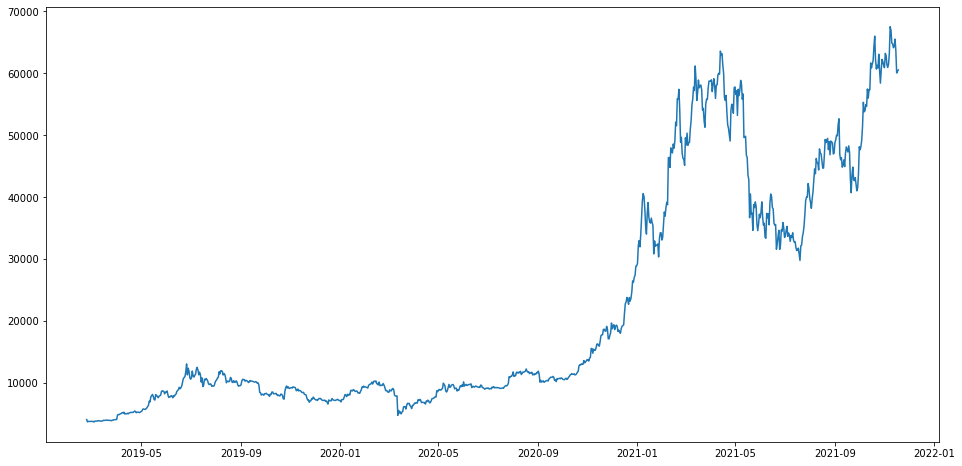

In [19]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [20]:
df['Date'] = pd.to_numeric(df['Date'], errors='coerce')

C:\Users\mathi\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
btc_daily_df['Date'].dtypes

dtype('O')

In [22]:
df.shape

(1000, 2)

In [23]:
X_train = np.array(df.iloc[:800, 0]).reshape(-1, 1)
y_train = df.iloc[:800, 1]

In [24]:
# Reshape index column to 2D array for .fit() method
#X_train = np.array(df.iloc[:800, 0]).reshape(-1, 1)
#y_train = train['Close']

In [25]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# The coefficient
print('Slope:', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept:', model.intercept_)

Slope: 5.354141405193277e-13
Intercept: -833269.7677665924


C:\Users\mathi\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  


In [27]:
model.predict(X_train)

array([-2.90668552e+03, -2.86042574e+03, -2.81416595e+03, -2.76790617e+03,
       -2.72164639e+03, -2.67538661e+03, -2.62912683e+03, -2.58286705e+03,
       -2.53660726e+03, -2.49034748e+03, -2.44408770e+03, -2.39782792e+03,
       -2.35156814e+03, -2.30530836e+03, -2.25904857e+03, -2.21278879e+03,
       -2.16652901e+03, -2.12026923e+03, -2.07400945e+03, -2.02774966e+03,
       -1.98148988e+03, -1.93523010e+03, -1.88897032e+03, -1.84271054e+03,
       -1.79645076e+03, -1.75019097e+03, -1.70393119e+03, -1.65767141e+03,
       -1.61141163e+03, -1.56515185e+03, -1.51889207e+03, -1.47263228e+03,
       -1.42637250e+03, -1.38011272e+03, -1.33385294e+03, -1.28759316e+03,
       -1.24133338e+03, -1.19507359e+03, -1.14881381e+03, -1.10255403e+03,
       -1.05629425e+03, -1.01003447e+03, -9.63774685e+02, -9.17514903e+02,
       -8.71255121e+02, -8.24995340e+02, -7.78735558e+02, -7.32475776e+02,
       -6.86215994e+02, -6.39956213e+02, -5.93696431e+02, -5.47436649e+02,
       -5.01176867e+02, -

In [28]:
X_train.shape

(800, 1)

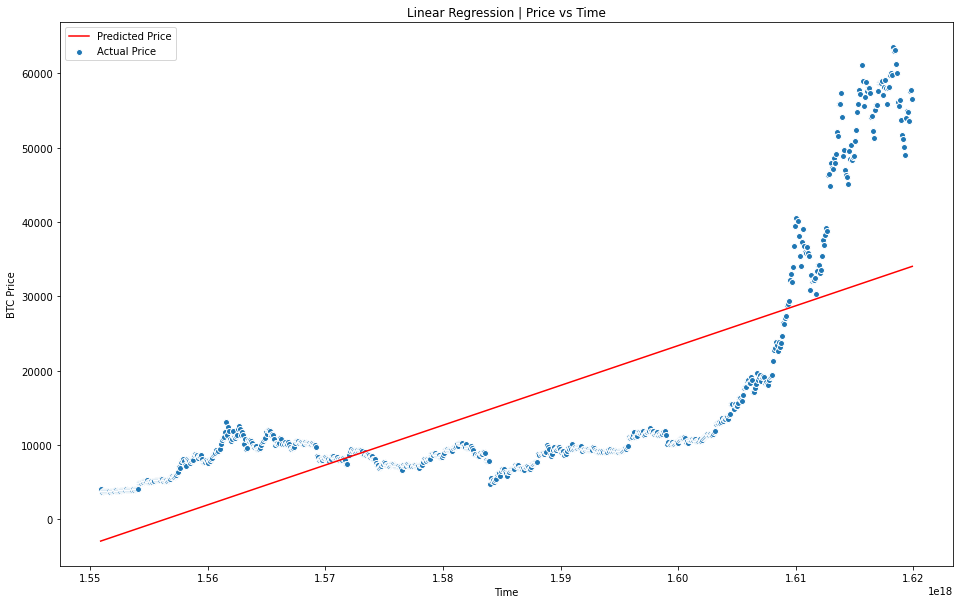

In [29]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('BTC Price')
plt.legend()
plt.show()

In [30]:
model.predict(X_train)

array([-2.90668552e+03, -2.86042574e+03, -2.81416595e+03, -2.76790617e+03,
       -2.72164639e+03, -2.67538661e+03, -2.62912683e+03, -2.58286705e+03,
       -2.53660726e+03, -2.49034748e+03, -2.44408770e+03, -2.39782792e+03,
       -2.35156814e+03, -2.30530836e+03, -2.25904857e+03, -2.21278879e+03,
       -2.16652901e+03, -2.12026923e+03, -2.07400945e+03, -2.02774966e+03,
       -1.98148988e+03, -1.93523010e+03, -1.88897032e+03, -1.84271054e+03,
       -1.79645076e+03, -1.75019097e+03, -1.70393119e+03, -1.65767141e+03,
       -1.61141163e+03, -1.56515185e+03, -1.51889207e+03, -1.47263228e+03,
       -1.42637250e+03, -1.38011272e+03, -1.33385294e+03, -1.28759316e+03,
       -1.24133338e+03, -1.19507359e+03, -1.14881381e+03, -1.10255403e+03,
       -1.05629425e+03, -1.01003447e+03, -9.63774685e+02, -9.17514903e+02,
       -8.71255121e+02, -8.24995340e+02, -7.78735558e+02, -7.32475776e+02,
       -6.86215994e+02, -6.39956213e+02, -5.93696431e+02, -5.47436649e+02,
       -5.01176867e+02, -

In [31]:
X_test = np.array(df.iloc[800:, 0]).reshape(-1, 1)
y_test = df.iloc[800:, 1]

In [32]:
model.predict(X_test)

array([34101.13987472, 34147.39965646, 34193.6594382 , 34239.91921994,
       34286.17900168, 34332.43878342, 34378.69856516, 34424.9583469 ,
       34471.21812865, 34517.47791039, 34563.73769213, 34609.99747387,
       34656.25725561, 34702.51703735, 34748.77681909, 34795.03660083,
       34841.29638257, 34887.55616431, 34933.81594605, 34980.07572779,
       35026.33550954, 35072.59529128, 35118.85507302, 35165.11485476,
       35211.3746365 , 35257.63441824, 35303.89419998, 35350.15398172,
       35396.41376346, 35442.6735452 , 35488.93332694, 35535.19310869,
       35581.45289043, 35627.71267217, 35673.97245391, 35720.23223565,
       35766.49201739, 35812.75179913, 35859.01158087, 35905.27136261,
       35951.53114435, 35997.79092609, 36044.05070783, 36090.31048958,
       36136.57027132, 36182.83005306, 36229.0898348 , 36275.34961654,
       36321.60939828, 36367.86918002, 36414.12896176, 36460.3887435 ,
       36506.64852524, 36552.90830698, 36599.16808873, 36645.42787047,
      

In [33]:
y_test

Date
2021-05-03    57169.39
2021-05-04    53200.01
2021-05-05    57436.11
2021-05-06    56393.68
2021-05-07    57314.75
                ...   
2021-11-14    65519.10
2021-11-15    63606.74
2021-11-16    60058.87
2021-11-17    60344.87
2021-11-18    60547.62
Name: Close, Length: 200, dtype: float64

In [34]:
y_test = pd.DataFrame(y_test)
y_test 

,Close
Date,
2021-05-03,57169.39
2021-05-04,53200.01
2021-05-05,57436.11
2021-05-06,56393.68
2021-05-07,57314.75
...,...
2021-11-14,65519.10
2021-11-15,63606.74
2021-11-16,60058.87


In [35]:
model.predict(X_test) 

array([34101.13987472, 34147.39965646, 34193.6594382 , 34239.91921994,
       34286.17900168, 34332.43878342, 34378.69856516, 34424.9583469 ,
       34471.21812865, 34517.47791039, 34563.73769213, 34609.99747387,
       34656.25725561, 34702.51703735, 34748.77681909, 34795.03660083,
       34841.29638257, 34887.55616431, 34933.81594605, 34980.07572779,
       35026.33550954, 35072.59529128, 35118.85507302, 35165.11485476,
       35211.3746365 , 35257.63441824, 35303.89419998, 35350.15398172,
       35396.41376346, 35442.6735452 , 35488.93332694, 35535.19310869,
       35581.45289043, 35627.71267217, 35673.97245391, 35720.23223565,
       35766.49201739, 35812.75179913, 35859.01158087, 35905.27136261,
       35951.53114435, 35997.79092609, 36044.05070783, 36090.31048958,
       36136.57027132, 36182.83005306, 36229.0898348 , 36275.34961654,
       36321.60939828, 36367.86918002, 36414.12896176, 36460.3887435 ,
       36506.64852524, 36552.90830698, 36599.16808873, 36645.42787047,
      

In [36]:
df = df.iloc[800:]

In [37]:
df['Predictions'] = model.predict(X_test)

C:\Users\mathi\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
df.head(20)


,Date,Close,Predictions
Date,,,
2021-05-03,1620000000000000000,57169.39,34101.139875
2021-05-04,1620086400000000000,53200.01,34147.399656
2021-05-05,1620172800000000000,57436.11,34193.659438
2021-05-06,1620259200000000000,56393.68,34239.919220
2021-05-07,1620345600000000000,57314.75,34286.179002
2021-05-08,1620432000000000000,58862.05,34332.438783
2021-05-09,1620518400000000000,58240.84,34378.698565
2021-05-10,1620604800000000000,55816.14,34424.958347
2021-05-11,1620691200000000000,56670.02,34471.218129


In [39]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

C:\Users\mathi\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
df

,Close,Predictions
Date,,
2021-05-03,57169.39,34101.139875
2021-05-04,53200.01,34147.399656
2021-05-05,57436.11,34193.659438
2021-05-06,56393.68,34239.919220
2021-05-07,57314.75,34286.179002
...,...,...
2021-11-14,65519.10,43121.797314
2021-11-15,63606.74,43168.057096
2021-11-16,60058.87,43214.316878


In [60]:
BTC_Linear_Regression_Results = df 
BTC_Linear_Regression_Results

,Close,Predictions
Date,,
2021-05-03,57169.39,34101.139875
2021-05-04,53200.01,34147.399656
2021-05-05,57436.11,34193.659438
2021-05-06,56393.68,34239.919220
2021-05-07,57314.75,34286.179002
...,...,...
2021-11-14,65519.10,43121.797314
2021-11-15,63606.74,43168.057096
2021-11-16,60058.87,43214.316878


In [61]:
BTC_Linear_Regression_Results = BTC_Linear_Regression_Results.reset_index()
BTC_Linear_Regression_Results

,Date,Close,Predictions
0,2021-05-03,57169.39,34101.139875
1,2021-05-04,53200.01,34147.399656
2,2021-05-05,57436.11,34193.659438
3,2021-05-06,56393.68,34239.919220
4,2021-05-07,57314.75,34286.179002
...,...,...,...
195,2021-11-14,65519.10,43121.797314
196,2021-11-15,63606.74,43168.057096
197,2021-11-16,60058.87,43214.316878
198,2021-11-17,60344.87,43260.576659


In [62]:
from sqlalchemy import create_engine

In [63]:
asset_connection_string = "postgres:dataprojects123@demodatabase.c82n6mge8kkd.us-east-2.rds.amazonaws.com/Crypto_Data" 
engine = create_engine(f'postgresql://{asset_connection_string}') 

In [65]:
BTC_Linear_Regression_Results.to_sql(name='btc_linear_regression_results', con=engine, if_exists='append', index=True)